# 로지스틱 회귀

## 1. 로지스틱 회귀란?
### 정의
> 선형 회귀 모델을 기반으로 한 `분류` 알고리즘
- 이진 분류 문제 
  - 0과 1로 구성된 분류 문제에 적합한 함수 -> 시그모이드 함수 사용 
- 시그모이드 함수는 입력값을 0과 1 사이의 확률로 변환
  - 0과 1에 속할 확률값을 출력

### 시그모이드 함수 (Sigmoid Function)
$$ f(z) = \sigma(z) = \frac{1}{1 + e^{-z}}$$
- $\hat{y} = 0 $ : $f(z) < 0.5$
- $\hat{y} = 1 $ : $f(z) \geq 0.5$
- [0, 1] : 0과 1사이 값 
- 미분 가능 
- 0.5 부근에서 급격히 완화
- `로지스틱` 함수라고도 불림 
  - $z = wx + b = logit$ 이라고 불림

### 로지스틱 회귀 분류기 구현 
- `binary-class` : 가장 단순한 분류기 
- `sklearn.linear_model.LogisticRegression` 
  - `solver="lbfgs"`

## 2. 파이썬을 통한 구현

### 0) 실습 설명 

- 특정 사용자가 구매를 할지 여부 예측 
  - `1` : 구매
  - `0` : 구매하지 않음

|구분|설명|
|---|---|
|Dataset|datasets/Social_Network_Ads.csv|
|Features|연령, 추정 급여|
|Target|구매 여부|
|Model|LogisticRegression|
|평가 지표|Confusion Matrix, f1-score|
|시각화|ROC Curve|

### 1) 필요 라이브러리 임포트

In [3]:
### 기본 라이브러리
import numpy as np
import pandas as pd
### 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
### 모델링 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

### 2) 데이터 불러오기

In [5]:
dataset = pd.read_csv("..\infran_ML_DL-main\datasets\Social_Network_Ads.csv")

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\skssk\AppData\Local\Temp\ipykernel_27088\1891580795.py:1: SyntaxWarning: invalid escape sequence '\i'
  dataset = pd.read_csv("..\infran_ML_DL-main\datasets\Social_Network_Ads.csv")


- 데이터 확인 
  - 사용할 데이터 : `Age`, `EstimatedSalary`, `Purchased`

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


- 총 데이터 수 확인 = 400개

In [7]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

### 3) 변수 선택
- 독립변수 X : Age, EstimatedSalary
- 종속변수 y : Purchased

In [8]:
X=dataset.iloc[:, [2, 3]].values.astype("float32")
y=dataset.iloc[:, 4].values.astype("float32")

- 훈련셋과 테스트셋으로 분리 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (320, 2)
y_train shape:  (320,)
X_test shape:  (80, 2)
y_test shape:  (80,)


### 4) Feature Scaling

- 나이와 연봉은 서로 다른 단위 
- 조정이 없으면 연봉의 수가 크기 때문에 모델이 나이보다 연봉에 더 큰 영향을 받게 됨

In [11]:
### 스케일러 선언 - 표준화
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### 5) 모델링 

In [14]:
### 모델 선언 
lr_clf = LogisticRegression(solver="lbfgs",random_state=0)
### 모델 훈련
lr_clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

### 6) 모델 예측

In [19]:
### 모델 예측
y_pred = lr_clf.predict(X_test)

print("TEST SET의 True Positive : ", sum(y_pred == 1))
print("모델 예측 Positive : ", sum(y_pred))

TEST SET의 True Positive :  18
모델 예측 Positive :  18.0


### 7) 성능 평가

In [20]:
print("정확도 : ", accuracy_score(y_test, y_pred))
print("정밀도 : ", precision_score(y_test, y_pred))
print("재현율 : ", recall_score(y_test, y_pred))

정확도 :  0.925
정밀도 :  0.9444444444444444
재현율 :  0.7727272727272727


### 8) 시각화

- Confusion Matrix 확인

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[17  5]
 [ 1 57]]


- 그래프로 그려보기 

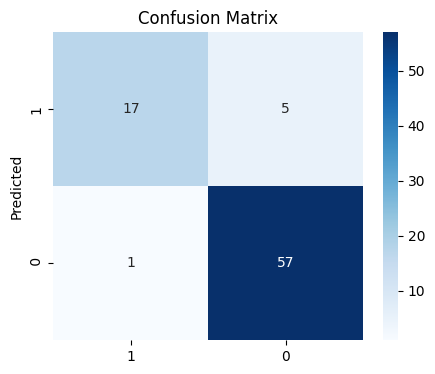

In [29]:
plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["1", "0"], yticklabels=['1', ' 0'])
ax.set_ylabel("Predicted")
ax.set_title('Confusion Matrix')
None

#### ROC Curve

- ROC 계산

In [30]:
y_prob = lr_clf.predict_proba(X_test)
y_score = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

- 시각화

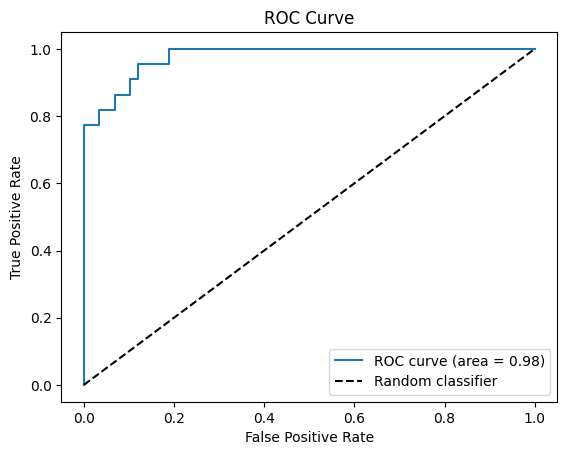

In [31]:
plt.plot(fpr, tpr, label="ROC curve (area = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
None